In [3]:
#Step 1: Data Understanding
	#1. Load the dataset into Python using pandas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=df = pd.read_csv("D:\MUFG\student_performance decision tree.csv")

	
	


In [4]:
#2. Display the first 5 rows and describe each feature.
df.head()

,Hours_Studied,Previous_Scores,Extracurricular,Sleep_Hours,Internet_Access,Attendance,Performance
0,2,40,No,6,Yes,70,Low
1,5,60,Yes,7,Yes,80,Medium
2,8,85,No,8,Yes,90,High
3,1,35,No,5,No,60,Low
4,6,75,Yes,7,Yes,85,High


In [5]:
#3. Check for missing values and handle them if any.
df.shape

(20, 7)

In [6]:
df.isnull().sum()

Hours_Studied      0
Previous_Scores    0
Extracurricular    0
Sleep_Hours        0
Internet_Access    0
Attendance         0
Performance        0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Hours_Studied    20 non-null     int64 
 1   Previous_Scores  20 non-null     int64 
 2   Extracurricular  20 non-null     object
 3   Sleep_Hours      20 non-null     int64 
 4   Internet_Access  20 non-null     object
 5   Attendance       20 non-null     int64 
 6   Performance      20 non-null     object
dtypes: int64(4), object(3)
memory usage: 1.2+ KB


In [9]:
df.describe()

,Hours_Studied,Previous_Scores,Sleep_Hours,Attendance
count,20.000000,20.000000,20.000000,20.000000
mean,4.600000,60.650000,6.500000,78.950000
std,2.414866,18.345443,1.051315,11.874231
min,1.000000,30.000000,5.000000,55.000000
25%,2.750000,46.500000,6.000000,70.000000
50%,4.500000,59.000000,6.500000,80.000000
75%,6.250000,75.750000,7.000000,88.500000
max,9.000000,92.000000,8.000000,96.000000


In [23]:
#Step 2: Data Preprocessing
#4. Convert categorical variables (Extracurricular, Internet_Access) into numerical form.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Extracurricular"] = le.fit_transform(df["Extracurricular"])
df["Internet_Access"] = le.fit_transform(df["Internet_Access"])

# Duplicate Hours_Studied feature(Scaling)
df["Hours_Studied_2"] = df["Hours_Studied"] * 2
df["Hours_Studied_3"] = df["Hours_Studied"] * 3


In [24]:
#5. Split the dataset into features (X) and target (y).
X = df.drop("Performance", axis=1)
y = df["Performance"]

In [25]:
#6. Perform train-test split (70% train, 30% test).
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
#Step 3: Model Building
# 7.Train a Decision Tree Classifier on the training set.
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
#8.  Print the learned decision rules (tree structure).
#When we train a Decision Tree, the algorithm learns patterns from the data and represents them as a series of IF–ELSE rules.
from sklearn.tree import export_text
print(export_text(dtc, feature_names=list(X.columns)))

|--- Hours_Studied <= 3.50
|   |--- class: Low
|--- Hours_Studied >  3.50
|   |--- Previous_Scores <= 65.00
|   |   |--- class: Medium
|   |--- Previous_Scores >  65.00
|   |   |--- class: High



In [28]:
#Step 4: Model Evaluation
# 9. Predict on the test set.
y_pred = dtc.predict(X_test)
print(y_pred)


['Low' 'High' 'Medium' 'Medium' 'Medium' 'Medium']


In [29]:
# 10. Evaluate performance using accuracy, confusion matrix, and classification report.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[1 0 0]
 [0 1 0]
 [0 0 4]]
Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00         1
         Low       1.00      1.00      1.00         1
      Medium       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [30]:
#Step 5: Model Tuning
# 11. Experiment with max_depth and criterion (gini vs entropy). Compare results.

#We limit depth to 3 (max_depth=3)
#→ tree can only make 3 splits → prevents overfitting.
#We change criterion from "gini" to "entropy"
#→ tree chooses splits based on information gain.
dtc_tuned = DecisionTreeClassifier(max_depth=3, criterion="entropy", random_state=42)
dtc_tuned.fit(X_train, y_train)

# Predictions
y_pred_tuned = dtc_tuned.predict(X_test)

#We evaluate accuracy again
#→ check if tuning improved performance.
print("Tuned Tree Accuracy:", accuracy_score(y_test, y_pred_tuned))

Tuned Tree Accuracy: 1.0


In [31]:
# Get and display feature importance
importances = dtc_tuned.feature_importances_

for feature, score in sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {score:.3f}")


Hours_Studied: 0.680
Previous_Scores: 0.320
Extracurricular: 0.000
Sleep_Hours: 0.000
Internet_Access: 0.000
Attendance: 0.000
Hours_Studied_2: 0.000
Hours_Studied_3: 0.000


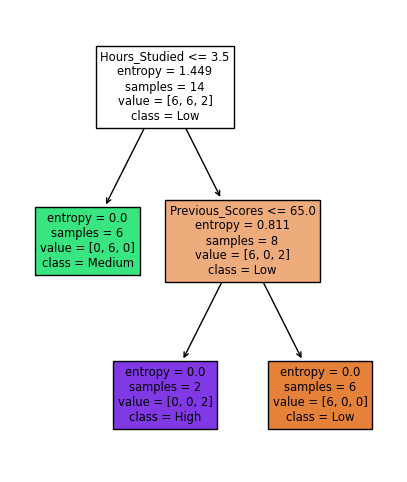

In [32]:
# 12. Plot the decision tree and interpret which features are most important.
from sklearn.tree import plot_tree
plt.figure(figsize=(5,6))
plot_tree(dtc_tuned, feature_names=X.columns, class_names=["Low","Medium","High"], filled=True)
plt.show()

In [35]:
#Step 6: Insights & Conclusion
#13. Which features influence student performance the most?
print("Most important features:", X.columns[np.argsort(importances)[::-1]])

#14. If you were a teacher, how would you use these insights to help students improve?
print("As a teacher: I would advise students to focus on study hours, since it is the strongest factor for performance. Along with study, sleep and internet access also play a role.")


Most important features: Index(['Hours_Studied', 'Previous_Scores', 'Hours_Studied_3',
       'Hours_Studied_2', 'Attendance', 'Internet_Access', 'Sleep_Hours',
       'Extracurricular'],
      dtype='object')
As a teacher: I would advise students to focus on study hours, since it is the strongest factor for performance. Along with study, sleep and internet access also play a role.
